# 1.0 Introduction

Our project is focusing on the implementation of Aspect-Based
Sentiment Analysis (ABSA) using the popular Amazon products review datasets. Aspect-Based
Sentiment Analysis (ABSA) is an advanced technique in natural language processing (NLP) that
goes beyond determining the overall sentiment of a text. Instead, it identifies sentiments related
to specific aspects of a product or service mentioned in the text. The example below
demonstrates the difference between Traditional Sentiment Analysis and Aspect-Based
Sentiment Analysis using a sample Hotel Review.  

(INSERT THE  PIC)

This project aims to take traditional sentiment analysis a step further, to dissect customer
reviews into specific sentiment details thereby providing granular and actionable insights into
what aspects customers liked or disliked about the product and service.

# 2.0 Data Collection

The project's initial phase involves collecting and preprocessing Amazon product reviews,
accessible from a well-known repository. This extensive dataset encompasses a wide range of
product categories, from books and arts to beauty and fashion, offering a rich diversity for
analysis. The variety in categories challenges us to develop specialized techniques that go
beyond basic sentiment classification, aiming to extract specific insights related to various
aspects mentioned in the reviews. Implementing this step, we will employ scripts to automate
the download and initial preprocessing of these datasets, ensuring a broad and representative
sample for our analysis.

# 3.0 Exploratory Data Analysis (EDA)

In the initial stage of data preprocessing, it is imperative to conduct a comprehensive examination of the database. This entails thoroughly understanding the structure, content, and quality of the data. By meticulously reviewing the database, we can gain insights into its intricacies, identify any anomalies or inconsistencies, and lay the groundwork for subsequent preprocessing tasks.

The metadata of the review datafiles is available below:

**overall:** rating of the product <br>
**verified:** whether the *ID* or *text* True or False <br>
**reviewTime:** time of the review (raw) <br>
**reviewerID:** ID of the reviewer, e.g. A2SUAM1J3GNN3B <br>
**asin:** ID of the product, e.g. 0000013714 <br>
**style:** a dictionary of the product metadata, e.g., "Format" is "Hardcover" <br>
**reviewerName:** name of the reviewer <br>
**reviewText:** text of the review <br>
**summary:** summary of the review <br>
**unixReviewTime:** time of the review (unix time) <br>
**vote:** helpful votes of the review <br>
**image:** images that users post after they have received the product

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Reading the Dataset

We begin by reading the file into a pandas object for inspection.

In [2]:
Amazon_D  = pd.read_json('AMAZON_FASHION_5.json.gz', lines=True)
Amazon_D.head( )

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


#### Shape of the dataset

Now we will comprehend the size and structure of the dataset.

In [3]:
Amazon_D.shape

(3176, 12)

The dataframe comprises 3176 rows, representing reviews, and 12 columns, representing different fields. However, not all columns are essential for the final task. Consequently, The unnecessary fields will be systematically eliminated.

Now will check the datatypes of the dataframe.

In [4]:
Amazon_D.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   int64  
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   style           3107 non-null   object 
 6   reviewerName    3176 non-null   object 
 7   reviewText      3160 non-null   object 
 8   summary         3176 non-null   object 
 9   unixReviewTime  3176 non-null   int64  
 10  vote            297 non-null    float64
 11  image           106 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 276.2+ KB


> Here you can see that the "Overall" rating is an integer, Verification is Boolean, "vote" is float and the rest are objects.

### Basic Subsetting

The next step is to subset the data to work with a smaller more meaningful dataset. We will implement the following steps to reduce the size of our dataset.

1. **Verified=True:** We will only work with verified Reviews
2. **Drop Columns:** We will drop non-essential columns
3. **Drop duplicates:** We will also drop duplicates to reduce the size of the reviews

#### Selecting Verified Review

In this step, the dataframe will be filtered to include only the rows where the 'verified' value is **'True'**.

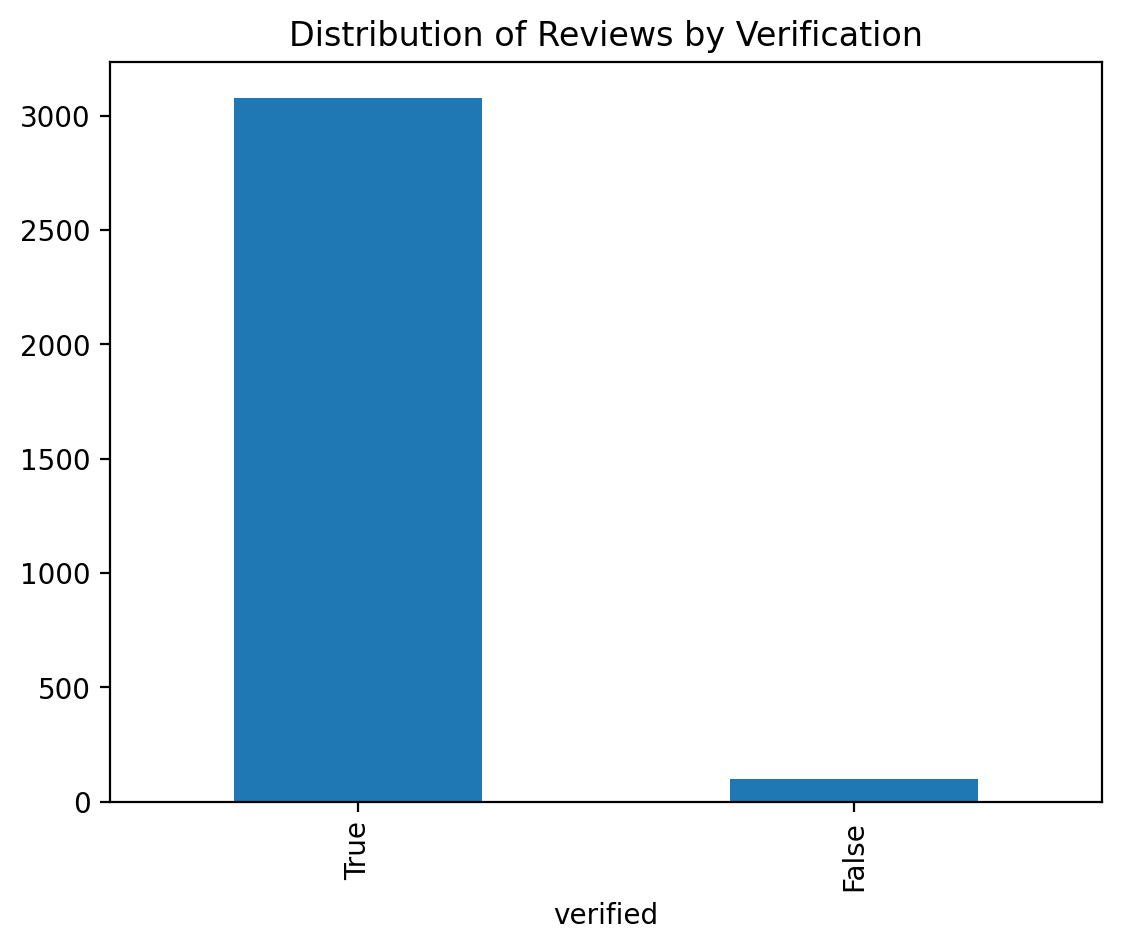

In [5]:
Amazon_D.verified.value_counts().plot(kind='bar', title='Distribution of Reviews by Verification')
plt.show()

In [6]:
Amazon_D = Amazon_D[Amazon_D.verified == True].copy()

In [7]:
Amazon_D.shape

(3079, 12)

Here, it's evident that the previous review count was 3176, and after filtering for only 'True' verifications, it has reduced to 3079. This reduction of 97 reviews indicates the number of entries with 'False' verifications.

#### Drop unnecessary fields

A variety of columns serve as metadata but are not crucial for the subsequent Natural Language Processing (NLP) steps. To streamline the dataset, we must drop down the columns. The significant columns to retain are:

1. Overall : rating of the product
2. reviewer ID : ID of the reviewer, e.g. A2SUAM1J3GNN3B
3. asin : ID of the product, e.g. 0000013714
4. review text : text of the review
5. summary : summary of the review

First will review all the columns in the dataframe.

In [8]:
Amazon_D.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

Now only necessary fields will be kept in the dataset.

In [9]:
cols = ['overall', 'reviewText','summary','reviewerID','asin']
Amazon_D1=Amazon_D[cols].copy()

In [10]:
Amazon_D1.shape

(3079, 5)

In [11]:
Amazon_D1.head()

,overall,reviewText,summary,reviewerID,asin
0,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
1,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
2,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
3,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
4,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K


#### Checking for duplicates

Now it's time to check for duplications.

In [12]:
Amazon_D1.reviewerID.value_counts()

reviewerID
A37K0VP2H8FKOU    16
A3OP70LPLALBKN    16
A3BN0MRGRDKM0J    10
A2YI41MCJB2QCV     9
A3VGHF7VNFBMCQ     9
                  ..
A33GD4H5O1MK6S     5
A12DWXDNZQTKXQ     5
A2VR6SWVSF6K4      5
ALJ66O1Y6SLHA      5
A3CNRM11BHAR1A     4
Name: count, Length: 395, dtype: int64

The total number of unique reviewer IDs are 395 in this case.

In [13]:
Amazon_D1[Amazon_D1.reviewerID == 'A37K0VP2H8FKOU']

,overall,reviewText,summary,reviewerID,asin
372,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B001IKJOLW
373,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B001IKJOLW
735,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0058YEJ5K
736,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0058YEJ5K
1090,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0014F7B98
1091,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0014F7B98
1458,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B009MA34NY
1459,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B009MA34NY
1827,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0092UF54A
1828,4,"I needed a wide size, that option was not avai...",Not quite wide enough,A37K0VP2H8FKOU,B0092UF54A


In [14]:
duplicates = Amazon_D1[Amazon_D1.duplicated(keep=False)]
duplicates.head()

,overall,reviewText,summary,reviewerID,asin
0,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
1,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
2,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
3,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
4,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K


Here, we have reviewed the details of duplicate entries, and now we will proceed to remove the duplicates while retaining the first occurrence of each duplicated row.

The "asin" column indicates the product ID. This is a useful filter against duplicates as it lets us know that the user has duplicate entries for the same product.

In [15]:
Amazon_D1.drop_duplicates(['reviewerID', 'asin'], keep='first', inplace=True)

In [16]:
Amazon_D1.shape

(2953, 5)

In [17]:
Amazon_D1.head()

,overall,reviewText,summary,reviewerID,asin
0,5,Great product and price!,Five Stars,ALJ66O1Y6SLHA,B000K2PJ4K
5,3,Waaay too small. Will use for futur children!,Oops!,A3W11493KS6Z2L,B000K2PJ4K
10,2,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,A3HX4X3TIABWOV,B000KPIHQ4
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,AW8UBYMNJ894V,B000KPIHQ4
12,5,We have used these inserts for years. They pr...,Great inserts,A265UZVOZWTTXQ,B000KPIHQ4


Now we have been dropped 126 duplicates from the dataset.

#### Dropping "reviewText" & "asin" columns

In [18]:
Amazon_D2=Amazon_D1[['overall','reviewText','summary']].copy()
Amazon_D2.head()

,overall,reviewText,summary
0,5,Great product and price!,Five Stars
5,3,Waaay too small. Will use for futur children!,Oops!
10,2,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist
11,2,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.
12,5,We have used these inserts for years. They pr...,Great inserts


In [19]:
Amazon_D2.shape

(2953, 3)

### Distribution of Ratings

With the initial parts of data subsetting out of the way, we can begin a more technical data exploration. Firstly, we look at the distribution of the reviews. This helps us gauge how much data we have to train that are both positive, negative, and neutral.

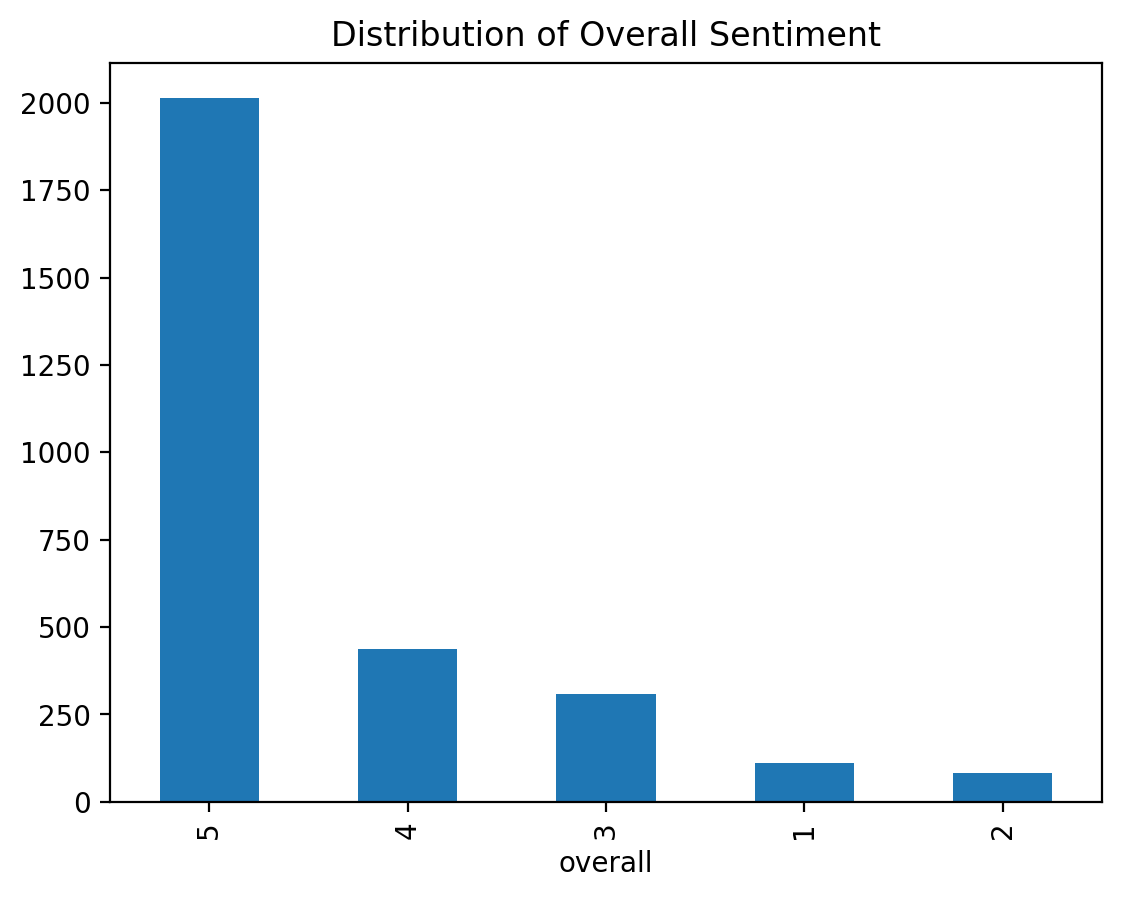

In [20]:
Amazon_D2.overall.value_counts().plot(kind='bar', title='Distribution of Overall Sentiment')
plt.show()

In [21]:
Amazon_D2.overall.value_counts(normalize=True)

overall
5    0.682357
4    0.147985
3    0.104639
1    0.037250
2    0.027768
Name: proportion, dtype: float64

**Note :** Unfortunately, We have significant class imbalance in ratings. 68% overall review classifications are 5 & 15% of overall review classifications are 4 so altogether all positive imapct 83%. Neutral overall review is 10%. Only 7% was negatively rated.

This will be problematic when developing the model as there are much fewer cases of negative and neutral sentiments compared to positive sentiments. However, for now, let's continue with text processing.

# 4.0 Methodology

# 5.0 Implementation

# 6.0 Results & Discussion

# 7.0 Conclusion & Future Work